<a href="https://colab.research.google.com/github/kietvuvan/AI/blob/master/hus_khdl_k3_biet_kiet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Tổng quan:
Dựa vào dữ liệu, xây dựng mô hình phân loại bệnh nhân thành các nhóm có mức độ: nặng, nhẹ

#1.Tiền xử lý dữ liệu 



In [ ]:
#install.packages("psych")
#install.packages("readr")
#install.packages("dplyr")

In [ ]:
library(readr)
library(dplyr)
data=read.csv("breast_cancer_dataset.csv",header = TRUE,na.strings = ".")
#is.data.frame(data)
names(data)

##1.1 Xem cấu trúc dữ liệu
Xem tên và kiểu dữ liệu của các biến 
+ Tên các biến, và các giá trị tương ứng glimpse
+ Xem thống kê theo từng biến summary

In [ ]:
glimpse(data)
summary(data)

Rows: 554
Columns: 10
$ clump_thickness             <int> 5, 5, 3, 6, 4, 8, 1, 2, 2, 4, 1, 2, 5, 1, …
$ uniformity_of_cell_size     <int> 1, 4, 1, 8, 1, 10, 1, 1, 1, 2, 1, 1, 3, 1,…
$ uniformity_of_cell_shape    <int> 1, 4, 1, 8, 1, 10, 1, 2, 1, 1, 1, 1, 3, 1,…
$ marginal_adhesion           <int> 1, 5, 1, 1, 3, 8, 1, 1, 1, 1, 1, 1, 3, 1, …
$ single_epithelial_cell_size <int> 2, 7, 2, 3, 2, 7, 2, 2, 2, 2, 1, 2, 2, 2, …
$ bare_nuclei                 <int> 1, 10, 2, 4, 1, 10, 10, 1, 1, 1, 1, 1, 3, …
$ bland_chromatin             <int> 3, 3, 3, 3, 3, 9, 3, 3, 1, 2, 3, 2, 4, 3, …
$ normal_nucleoli             <int> 1, 2, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 4, 1, …
$ mitosis                     <int> 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, …
$ class                       <int> 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, …


 clump_thickness  uniformity_of_cell_size uniformity_of_cell_shape
 Min.   : 1.000   Min.   : 1.000          Min.   : 1.000          
 1st Qu.: 2.000   1st Qu.: 1.000          1st Qu.: 1.000          
 Median : 4.000   Median : 1.000          Median : 2.000          
 Mean   : 4.567   Mean   : 3.202          Mean   : 3.273          
 3rd Qu.: 6.000   3rd Qu.: 5.000          3rd Qu.: 5.000          
 Max.   :10.000   Max.   :10.000          Max.   :10.000          
 marginal_adhesion single_epithelial_cell_size  bare_nuclei    
 Min.   : 1.000    Min.   : 1.000              Min.   : 1.000  
 1st Qu.: 1.000    1st Qu.: 2.000              1st Qu.: 1.000  
 Median : 1.000    Median : 2.000              Median : 1.000  
 Mean   : 2.872    Mean   : 3.319              Mean   : 3.785  
 3rd Qu.: 4.000    3rd Qu.: 4.000              3rd Qu.: 8.000  
 Max.   :10.000    Max.   :10.000              Max.   :10.000  
 bland_chromatin  normal_nucleoli     mitosis           class      
 Min.   : 1.000

#1.2 Kiểm tra và xử lý thiếu dữ liệu
+ Loại bỏ các bản ghi (hàng) có tất cả các cột đều rỗng (na.omit)
+ Cột thiếu dữ liệu: đếm số lượng thiếu data cho từng biến colSums(is.na(dataset2))

In [ ]:
data=na.omit(data)
str(data)
colSums(is.na(data))


'data.frame':	554 obs. of  10 variables:
 $ clump_thickness            : int  5 5 3 6 4 8 1 2 2 4 ...
 $ uniformity_of_cell_size    : int  1 4 1 8 1 10 1 1 1 2 ...
 $ uniformity_of_cell_shape   : int  1 4 1 8 1 10 1 2 1 1 ...
 $ marginal_adhesion          : int  1 5 1 1 3 8 1 1 1 1 ...
 $ single_epithelial_cell_size: int  2 7 2 3 2 7 2 2 2 2 ...
 $ bare_nuclei                : int  1 10 2 4 1 10 10 1 1 1 ...
 $ bland_chromatin            : int  3 3 3 3 3 9 3 3 1 2 ...
 $ normal_nucleoli            : int  1 2 1 7 1 7 1 1 1 1 ...
 $ mitosis                    : int  1 1 1 1 1 1 1 1 5 1 ...
 $ class                      : int  2 2 2 2 2 4 2 2 2 2 ...


clump_thickness     uniformity_of_cell_size 
                          0                           0 
   uniformity_of_cell_shape           marginal_adhesion 
                          0                           0 
single_epithelial_cell_size                 bare_nuclei 
                          0                           0 
            bland_chromatin             normal_nucleoli 
                          0                           0 
                    mitosis                       class 
                          0                           0

##1.3 Kiếm tra sự phụ thuộc của các biến giải thích
+ Kiểm tra hệ số tương quan, và nhận ra: uniformity_of_cell_size,uniformity_of_cell_shape

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
clump_thickness,1.0000000,0.6597222,0.6714162,0.4704917,0.5211842,0.6014928,0.5524061,0.5366702,0.3611883,0.7287187
uniformity_of_cell_size,0.6597222,1.0000000,0.9069651,0.6809823,0.7491584,0.7016277,0.7155139,0.7156362,0.4808982,0.8010495
uniformity_of_cell_shape,0.6714162,0.9069651,1.0000000,0.6592831,0.7201351,0.7246587,0.7051093,0.7122966,0.4505011,0.8115955
marginal_adhesion,0.4704917,0.6809823,0.6592831,1.0000000,0.5759205,0.6680967,0.6335516,0.6038080,0.4184594,0.6811496
single_epithelial_cell_size,0.5211842,0.7491584,0.7201351,0.5759205,1.0000000,0.5847962,0.5956968,0.6205534,0.4853536,0.6763502
bare_nuclei,0.6014928,0.7016277,0.7246587,0.6680967,0.5847962,1.0000000,0.6911997,0.5985622,0.3411885,0.8288120
bland_chromatin,0.5524061,0.7155139,0.7051093,0.6335516,0.5956968,0.6911997,1.0000000,0.6531457,0.3380382,0.7260176
normal_nucleoli,0.5366702,0.7156362,0.7122966,0.6038080,0.6205534,0.5985622,0.6531457,1.0000000,0.4251749,0.7108806
mitosis,0.3611883,0.4808982,0.4505011,0.4184594,0.4853536,0.3411885,0.3380382,0.4251749,1.0000000,0.4333013
class,0.7287187,0.8010495,0.8115955,0.6811496,0.6763502,0.8288120,0.7260176,0.7108806,0.4333013,1.0000000


Loading required package: psych



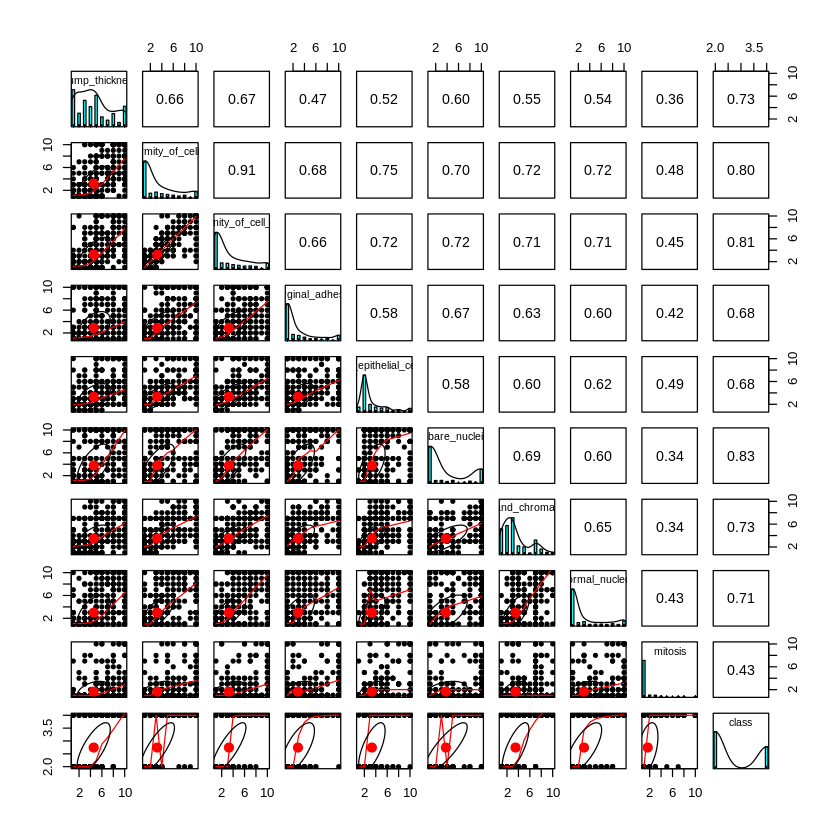

In [ ]:
cor(data)
require(psych)
pairs.panels(data)


#2: Xây dựng mô hình


#2.1: Chạy tổng thể

In [ ]:
fit=glm(factor(class)~.,family = binomial,data=data)
summary(fit)


Call:
glm(formula = factor(class) ~ ., family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3814  -0.1329  -0.0698   0.0345   2.3858  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -9.60035    1.16621  -8.232  < 2e-16 ***
clump_thickness              0.54138    0.14512   3.730 0.000191 ***
uniformity_of_cell_size     -0.08178    0.21244  -0.385 0.700281    
uniformity_of_cell_shape     0.34224    0.22747   1.505 0.132439    
marginal_adhesion            0.31377    0.12531   2.504 0.012282 *  
single_epithelial_cell_size  0.13247    0.16388   0.808 0.418888    
bare_nuclei                  0.37206    0.09900   3.758 0.000171 ***
bland_chromatin              0.37855    0.19529   1.938 0.052575 .  
normal_nucleoli              0.19899    0.11766   1.691 0.090808 .  
mitosis                      0.49813    0.34908   1.427 0.153591    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

#2.2: Xác đinh outliers
Nhằm tìm ra các điểm khác biệt với mô hình
+ điểm outliner nằm ở các dòng: 420, 245,191
và tiến hành loại bỏ qua lệnh
data1=data[-c(191,245,420),], thay thế data frame (tên là **data**) bằng biến mới **data1**


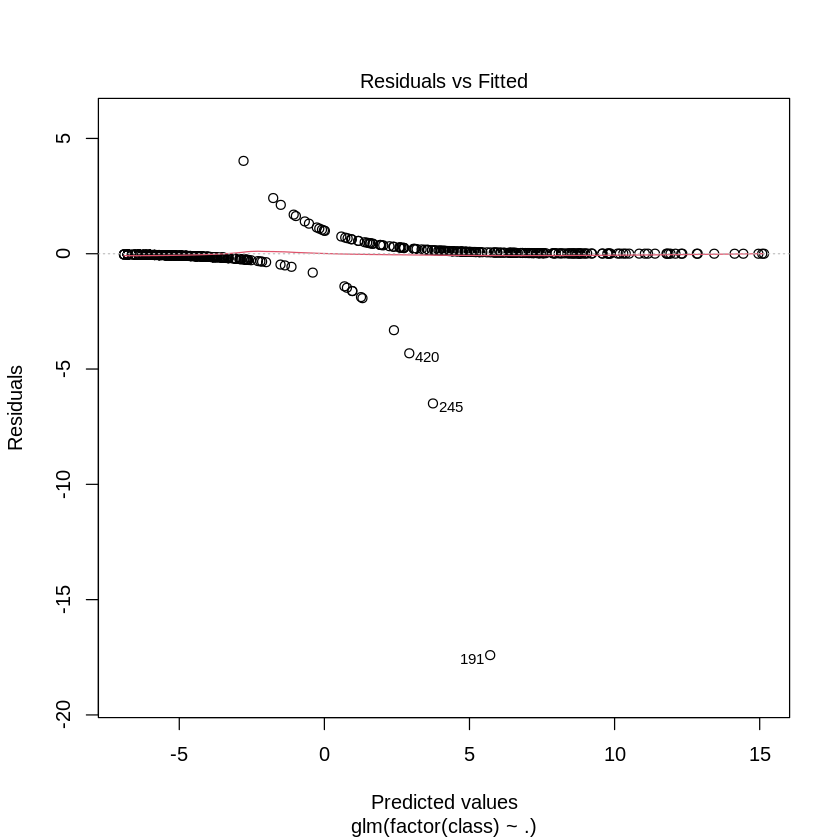

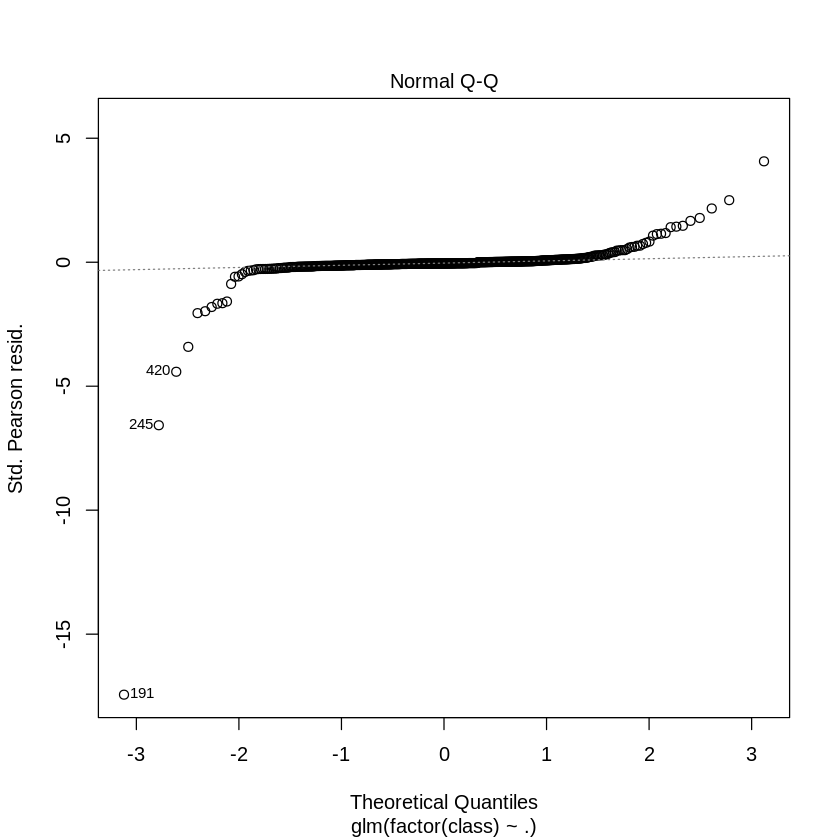

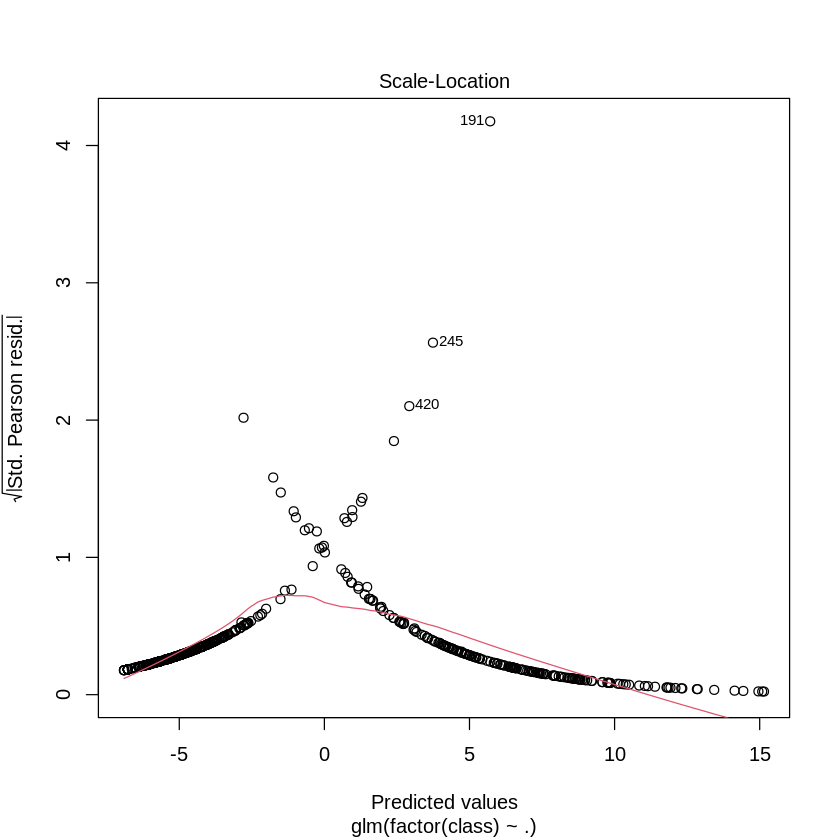

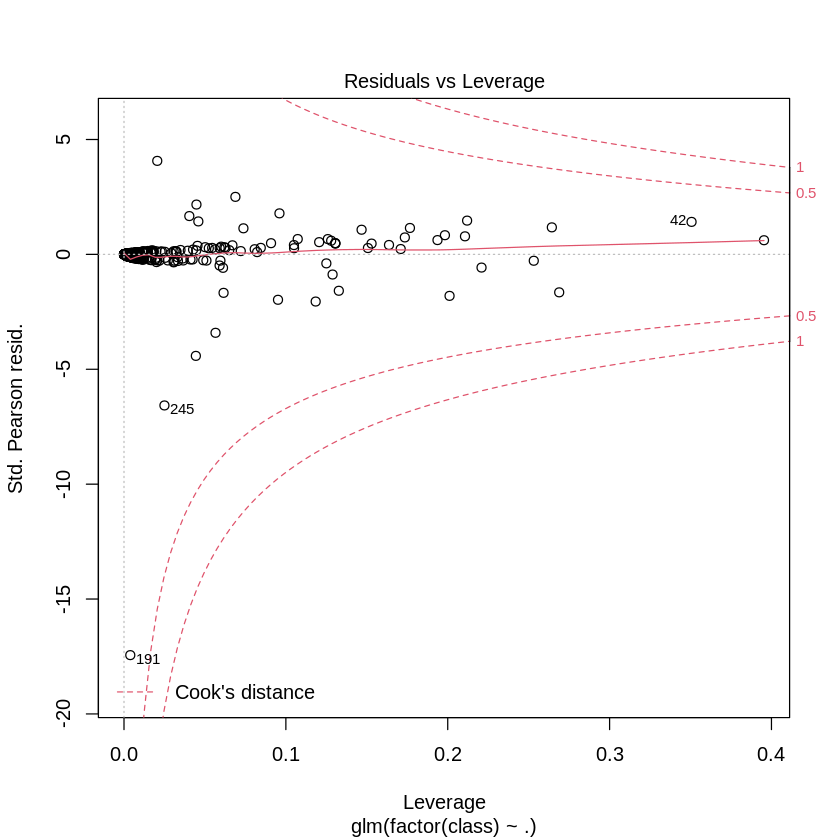

In [ ]:
plot(fit)

In [ ]:
data1=data[-c(191,245,420),]


#2.3: Chạy và đánh giá lại mô hình
Sau khi loại bỏ outliers, ta tiến hành chạy lại mô hình

###2.3.1 Chạy lại mô hình

In [ ]:
fit1=glm(factor(class)~.,family = binomial,data=data1)
summary(fit1)



Call:
glm(formula = factor(class) ~ ., family = binomial, data = data1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.65643  -0.08626  -0.03608   0.00708   2.28303  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -12.09790    1.81122  -6.679 2.40e-11 ***
clump_thickness               0.73819    0.20161   3.662 0.000251 ***
uniformity_of_cell_size       0.04658    0.30770   0.151 0.879667    
uniformity_of_cell_shape      0.15287    0.32009   0.478 0.632959    
marginal_adhesion             0.48744    0.16262   2.997 0.002722 ** 
single_epithelial_cell_size   0.04022    0.19506   0.206 0.836646    
bare_nuclei                   0.53476    0.13601   3.932 8.43e-05 ***
bland_chromatin               0.52112    0.24595   2.119 0.034103 *  
normal_nucleoli               0.28030    0.14835   1.889 0.058837 .  
mitosis                       0.91738    0.38062   2.410 0.015943 *  
---
Signif. codes:

###2.3.2 Sử dụng Chi-Square để đánh giá mô hình


Dựa trên nguyên tắc sau: giá trị chi-square nhỏ hơn 0.05 thì mô hình là khớp với dữ liệu. Ngược lại thì loại bỏ mô hình
Và giá trị tìm được là **1.84866654686062e-136** << 0.05

Vậy mô hình khớp với dữ liệu

In [ ]:
pchisq(728.401-67.611,550-541,lower.tail = FALSE)

[1] 1.848667e-136

###2.3.3: Tìm mô hình tối ưu.
Dựa trên giá trị đại lượng AIC
Chọn mô hình có giá trị AIC nhỏ nhất

In [ ]:
search=step(fit1)

Start:  AIC=87.61
factor(class) ~ clump_thickness + uniformity_of_cell_size + uniformity_of_cell_shape + 
    marginal_adhesion + single_epithelial_cell_size + bare_nuclei + 
    bland_chromatin + normal_nucleoli + mitosis

                              Df Deviance     AIC
- uniformity_of_cell_size      1   67.634  85.634
- single_epithelial_cell_size  1   67.653  85.653
- uniformity_of_cell_shape     1   67.833  85.833
<none>                             67.611  87.611
- normal_nucleoli              1   71.503  89.503
- bland_chromatin              1   72.314  90.314
- mitosis                      1   72.995  90.995
- marginal_adhesion            1   78.269  96.269
- clump_thickness              1   88.433 106.433
- bare_nuclei                  1   88.975 106.975

Step:  AIC=85.63
factor(class) ~ clump_thickness + uniformity_of_cell_shape + 
    marginal_adhesion + single_epithelial_cell_size + bare_nuclei + 
    bland_chromatin + normal_nucleoli + mitosis

                            

###2.3.4: Chọn mô hình tối ưu
Trong kết quả trên R báo cho chúng ta từng bước đi tìm mô hình tối ưu. Khởi đầu là mô hình 9 biến đầu vào với AIC=**87.61**. Kết quả qua 3 bước tìm mô hình thì R dừng lại mô hình 7 biến đầu vào với AIC=**82.58**

**factor(class) ~ clump_thickness + marginal_adhesion + bare_nuclei + bland_chromatin + normal_nucleoli + mitosi** ***(Mô hình 1)***

Mô hình chỉ rõ biến **class** phụ thuộc vào các biến: 
+ clump_thickness 
+ marginal_adhesion 
+ bare_nuclei, 
+ bland_chromatin 
+ normal_nucleoli 
+ mitosis


###2.3.5: Đánh giá mô hình
  Chạy câu lệnh dưới, kết quả cho thấy: p-value của từng biến độc lập trong **(Mô hình 1)** mục 2.3.4 đều < 0.05

In [ ]:
fit_after=glm(factor(class) ~ clump_thickness + marginal_adhesion + bare_nuclei + 
    bland_chromatin + normal_nucleoli + mitosis,family = binomial,data=data1)
summary(fit_after)


Call:
glm(formula = factor(class) ~ clump_thickness + marginal_adhesion + 
    bare_nuclei + bland_chromatin + normal_nucleoli + mitosis, 
    family = binomial, data = data1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.69925  -0.08610  -0.03258   0.00542   2.12740  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -12.4551     1.7888  -6.963 3.33e-12 ***
clump_thickness     0.8331     0.1825   4.566 4.97e-06 ***
marginal_adhesion   0.5393     0.1561   3.455  0.00055 ***
bare_nuclei         0.5910     0.1265   4.673 2.96e-06 ***
bland_chromatin     0.5540     0.2328   2.379  0.01735 *  
normal_nucleoli     0.3486     0.1332   2.616  0.00888 ** 
mitosis             0.9399     0.3731   2.519  0.01176 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 728.401  on 550  degrees of freedom
Residual deviance:  68.582  on 